# Ensemble learning - Zadanie 4
Klasyfikacja grzybów (https://archive.ics.uci.edu/ml/datasets/Mushroom) Przy użyciu danych mushrooms.csv zbuduj następujące modele: AdaBoost, XGBoost, LightGBM oraz CatBoost. Porównaj ich wyniki. Spróbuj ulepszyć wyniki każdego z wariantów poprzed dostrojenie parametrów - skorzystaj z dokumentacji wymienionych metod.

### Attribute Information: / Informacje o atrybucie:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



    1. kształt kapelusza: dzwon = b, stożkowy = c, wypukły = x, płaski = f, guzowaty = k, zatopiony = s
    2. powierzchnia kapelusza: włóknista = f, rowki = g, łuskowata = y, gładka = s
    3. kolor kapelusza: brązowy = n, płowożółty = b, cynamon = c, szary = g, zielony = r, różowy = p, fioletowy = u, czerwony = e, biały = w, żółty = y
    4. siniaki?: siniaki = t, nie = f
    5.zapach: migdał = a, anyż = l, kreozot = c, rybi = y, faul = f, stęchły = m, żaden = n, ostry = p, ostry = s
    6. przywiązanie skrzelowe: dołączone = a, malejące = d, wolne = f, karbowane = n
    7.odstępy między skrzelami: blisko = c, zatłoczone = w, odległe = d
    8.skrzela: szeroka = b, wąska = n
    9.kolor skrzeli: czarny = k, brązowy = n, płowożółty = b, czekoladowy = h, szary = g, zielony = r, pomarańczowy = o, różowy = p, fioletowy = u, czerwony = e, biały = w, żółty = y
    10.kształt łodygi: powiększenie = e, zwężenie = t
    11.korzeń szypułkowy: bulwiasty = b, klub = c, kielich = u, równy = e, ryzomorfy = z, zakorzeniony = r, brakujący =?
    12.powierzchnia łodygi-nad-pierścieniem: włóknista = f, łuskowata = y, jedwabista = k, gładka = s
    13. szypułka-powierzchnia-pod-ringiem: włóknista = f, łuskowata = y, jedwabista = k, gładka = s
    14.kolor-szypułki-nad-pierścieniem: brązowy = n, płowożółty = b, cynamon = c, szary = g, pomarańczowy = o, różowy = p, czerwony = e, biały = w, żółty = y
    15.kolor-szypułki-pod-ringiem: brązowy = n, płowożółty = b, cynamon = c, szary = g, pomarańczowy = o, różowy = p, czerwony = e, biały = w, żółty = y
    16. welonowe: częściowe = p, uniwersalne = u
    17. kolor welonu: brązowy = n, pomarańczowy = o, biały = w, żółty = y
    18. numer pierścienia: brak = n, jeden = o, dwa = t
    19.pierścień typu: pajęczyna = c, zanikający = e, rozkloszowany = f, duży = l, brak = n, wisiorek = p, poszycie = s, strefa = z
    20.kolor odcisku zarodników: czarny = k, brązowy = n, płowożółty = b, czekoladowy = h, zielony = r, pomarańczowy = o, fioletowy = u, biały = w, żółty = y
    21. populacja: liczna = a, skupiona = c, liczna = n, rozproszona = s, liczna = v, samotna = y
    22.siedlisko: trawy = g, liście = l, łąki = m, ścieżki = p, miasto = u, odpady = w, lasy = d

In [1]:
#importing important packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#wczytanie danych
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Attribute
df.columns.tolist()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [4]:
df.shape

(8124, 23)

In [5]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.isna()#.sum()
# False = no empty values

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


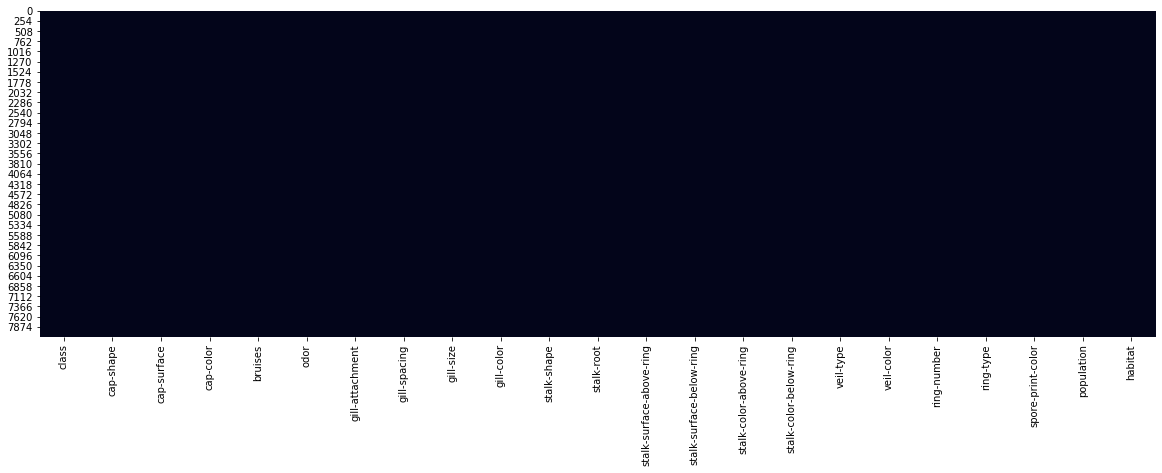

In [7]:
# Wizualizacja missingów
plt.figure(figsize=(20,6))
sns.heatmap(df.isna(), cbar=False)
plt.show()

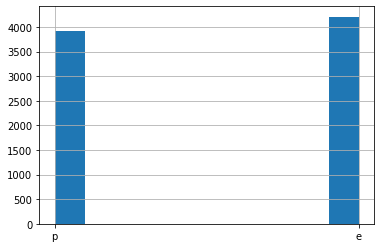

In [8]:
df['class'].hist()

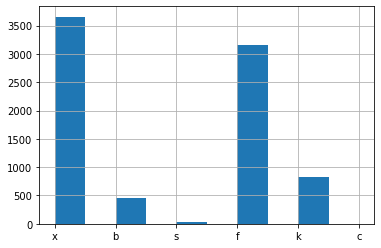

In [9]:
df['cap-shape'].hist()

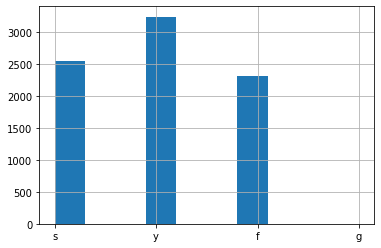

In [10]:
df['cap-surface'].hist()

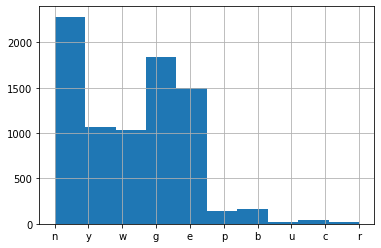

In [11]:
df['cap-color'].hist()

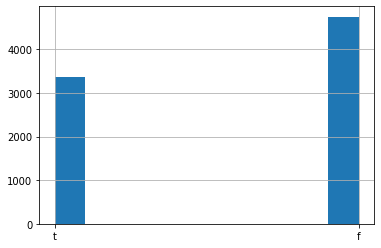

In [12]:
df['bruises'].hist()

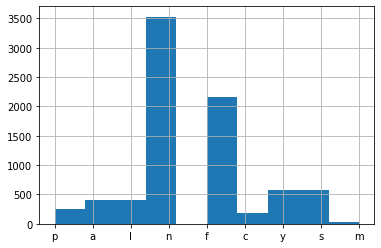

In [13]:
df['odor'].hist()

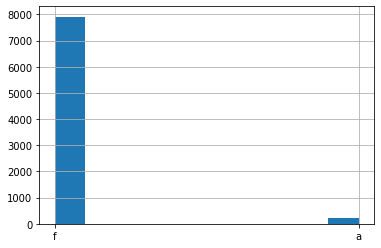

In [14]:
df['gill-attachment'].hist()

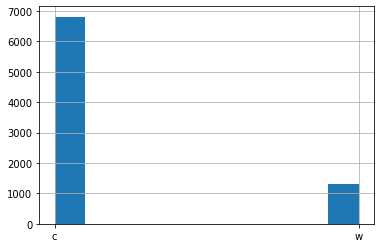

In [15]:
df['gill-spacing'].hist()

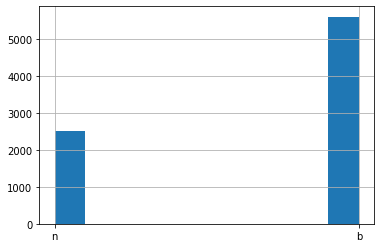

In [16]:
df['gill-size'].hist()

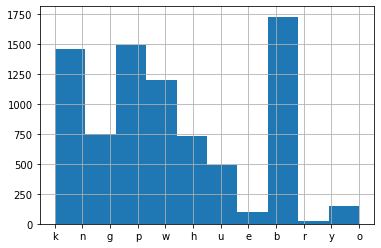

In [17]:
df['gill-color'].hist()

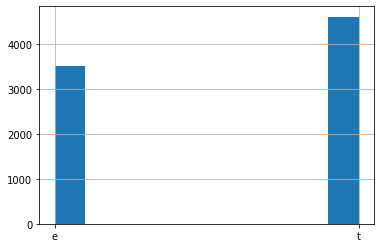

In [18]:
df['stalk-shape'].hist()

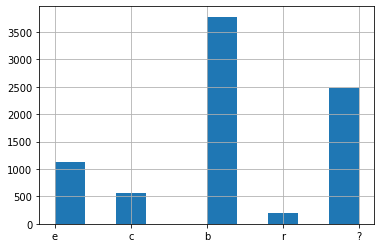

In [19]:
df['stalk-root'].hist()

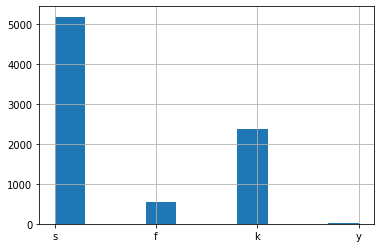

In [20]:
df['stalk-surface-above-ring'].hist()

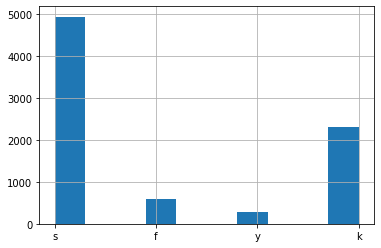

In [21]:
df['stalk-surface-below-ring'].hist()

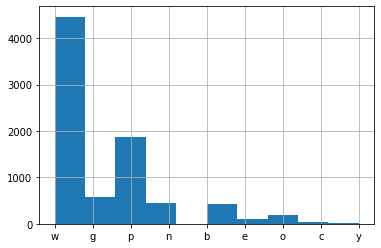

In [22]:
df['stalk-color-above-ring'].hist()

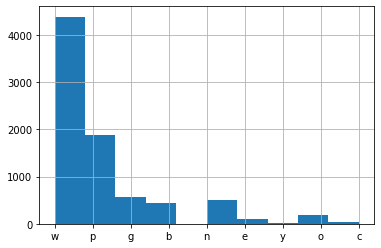

In [23]:
df['stalk-color-below-ring'].hist()

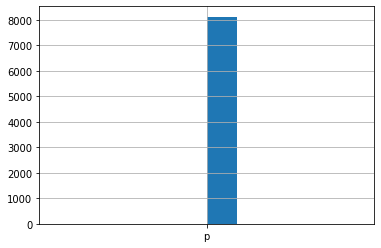

In [24]:
df['veil-type'].hist()

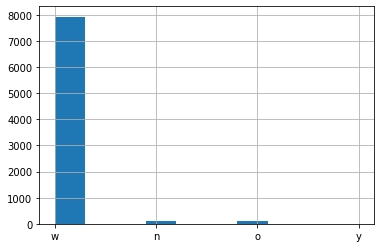

In [25]:
df['veil-color'].hist()

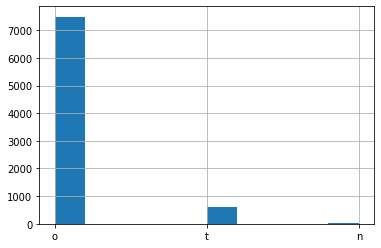

In [26]:
df['ring-number'].hist()

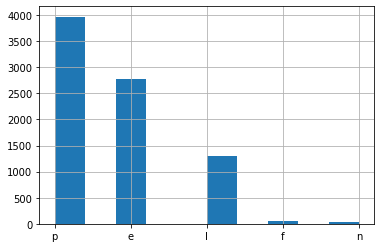

In [27]:
df['ring-type'].hist()

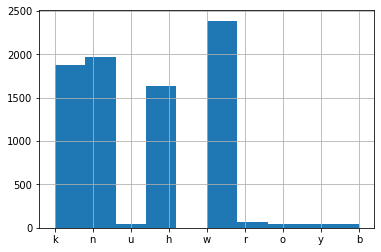

In [28]:
df['spore-print-color'].hist()

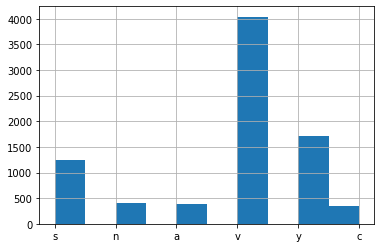

In [29]:
df['population'].hist()

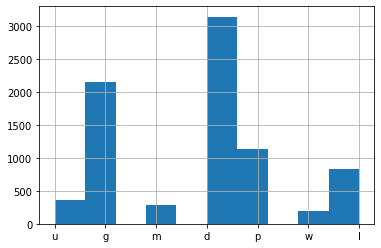

In [30]:
df['habitat'].hist()

In [31]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [32]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [33]:
# one-hot-encoding
# class -> 100% (BaggingClassifier)
df_dummies = pd.get_dummies(df.drop('class',axis=1))
target = df['class']
# cap-shape -> 13% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('cap-shape',axis=1))
# target = df['cap-shape']
# cap-surface -> 25% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('cap-surface',axis=1))
# target = df['cap-surface']
# cap-color -> 12% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('cap-color',axis=1))
# target = df['cap-color']
# bruises -> 100% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('bruises',axis=1))
# target = df['bruises']
# odor -> 70% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('odor',axis=1))
# target = df.odor
# gill-attachment -> 99% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('gill-attachment',axis=1))
# target = df['gill-attachment']
# gill-spacing -> 98% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('gill-spacing',axis=1))
# target = df['gill-spacing']
# gill-size -> 100% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('gill-size',axis=1))
# target = df['gill-size']
# gill-color -> 23% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('gill-color',axis=1))
# target = df['gill-color']
# stalk-shape -> 100% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('stalk-shape',axis=1))
# target = df['stalk-shape']
# stalk-root -> 100% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('stalk-root',axis=1))
# target = df['stalk-root']
# stalk-surface-above-ring -> 67% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('stalk-surface-above-ring',axis=1))
# target = df['stalk-surface-above-ring']
# stalk-surface-below-ring -> 67% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('stalk-surface-below-ring',axis=1))
# target = df['stalk-surface-below-ring']
# stalk-color-above-ring -> 43% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('stalk-color-above-ring',axis=1))
# target = df['stalk-color-above-ring']
# stalk-color-below-ring -> 43% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('stalk-color-below-ring',axis=1))
# target = df['stalk-color-below-ring']
# veil-type -> 100% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('veil-type',axis=1))
# target = df['veil-type']
# veil-color -> 97% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('veil-color',axis=1))
# target = df['veil-color']
# ring-number -> 100% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('ring-number',axis=1))
# target = df['ring-number']
# ring-type -> 100% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('ring-type',axis=1))
# target = df['ring-type']
# spore-print-color -> 57% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('spore-print-color',axis=1))
# target = df['spore-print-color']
# population -> 39% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('population',axis=1))
# target = df.population
# habitat -> 49% (BaggingClassifier)
# df_dummies = pd.get_dummies(df.drop('habitat',axis=1))
# target = df.habitat

In [34]:
df_dummies.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_dummies, target, test_size=0.3, random_state=0)

In [36]:
x_train

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
5314,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2075,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5165,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1155,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4448,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3264,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1653,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2607,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [37]:
y_train, y_test

(5314    p
 2075    e
 5165    p
 1155    e
 4448    p
        ..
 4931    e
 3264    p
 1653    e
 2607    e
 2732    e
 Name: class, Length: 5686, dtype: object,
 380     p
 3641    e
 273     e
 1029    e
 684     e
        ..
 520     e
 36      e
 7959    p
 6520    p
 6005    p
 Name: class, Length: 2438, dtype: object)

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1), n_estimators=10, max_samples=1.0,
    max_features=1.0)
model.fit(x_train, y_train)
model.score(x_test,y_test)

1.0

In [39]:
print(f"{model.score(x_test,y_test)}% na zbiorze testowym/score tj. predykcja naszego modelu na danych testowych")

1.0% na zbiorze testowym/score tj. predykcja naszego modelu na danych testowych


# Zmienna modelowana
Y = 'class': ('e', 'p')

In [40]:
set(y_train)

{'e', 'p'}

In [41]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1), n_estimators=8,
    max_samples=1.0,
    max_features=1.0)
# class
target_train = y_train.replace(('e', 'p'), (1, 0))
target_test = y_test.replace(('e', 'p'), (1, 0))
# odor
# target_train = y_train.replace(('a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'), (8, 7, 6, 5, 4, 3, 2, 1, 0))
# target_test = y_test.replace(('a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'), (8, 7, 6, 5, 4, 3, 2, 1, 0))
# veil-type
# target_train = y_train.replace(('p', 'u'), (1, 0))
# target_test = y_test.replace(('p', 'u'), (1, 0))
# population
# target_train = y_train.replace(('a', 'c', 'n', 's', 'v', 'y'), (5, 4, 3, 2, 1, 0))
# target_test = y_test.replace(('a', 'c', 'n', 's', 'v', 'y'), (5, 4, 3, 2, 1, 0))
# habitat
# target_train = y_train.replace(('g', 'l', 'm', 'p', 'u', 'w', 'd'), (6, 5, 4, 3, 2, 1, 0))
# target_test = y_test.replace(('g', 'l', 'm', 'p', 'u', 'w', 'd'), (6, 5, 4, 3, 2, 1, 0))
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.9997688411234992

In [42]:
# model.predict(x_train)# predykcja jeśli chodzi o etykiety
# model.predict_proba(target_test) #prawdopodobieństwo

#### miara determinacji, dlatego tak słaby wynik, ponieważ używamy złego modelu do złego zjawiska, nie powinniśmy używać modelu regresyjnego, czyli drzewa decyzyjnego regresyjnego, do problemu klasyfikującego, czy do problemu zero-jedynkowego, do problemu klasyfikacji

In [43]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

1.0

#### To samo co powyżej, AdaBoost dla Regresji jest zastosowaniem, złego modelu do złego zjawiska. Dlatego są słabe wyniki.

In [44]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.9872871075332755

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1, subsample=0.1, min_samples_split=2,
    min_samples_leaf=11, min_weight_fraction_leaf=0.001,
    max_depth=3,
    min_impurity_decrease=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9864643150123051

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.9987389585114739

In [47]:
# !pip3 install xgboost #instalacja
# !pip3 install lightgbm #instalacja
# !pip3 install catboost

In [48]:
import xgboost as xgb #wczytanie
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9971287940935193

In [49]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train, target_train)
model.score(x_test, target_test)

[13:39:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9985016135173442

# lightgbm

In [50]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=target_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(x_test)
for i in range(0,2438):
    if y_pred[i]>=0.5: 
       y_pred[i]=1
    else: 
       y_pred[i]=0

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of data points in the train set: 5686, number of used features: 107
[LightGBM] [Info] Start training from score 0.516356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [51]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=target_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_pred,target_test)**0.5

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of data points in the train set: 5686, number of used features: 107
[LightGBM] [Info] Start training from score 0.516356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [52]:
df_dummies = df_dummies.astype(np.int)
x_train = x_train.astype(np.int)
x_test = x_test.astype(np.int)
# df_dummies

In [53]:
model.predict(x_test).mean()

0.5168303828121042

# catboost

In [54]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,target_train,cat_features=([ 0, 1, 2, 3, 4, 10]),eval_set=(x_test, target_test))
model.score(x_test,target_test)

Learning rate set to 0.04868
0:	learn: 0.5821904	test: 0.5823299	best: 0.5823299 (0)	total: 51.9ms	remaining: 51.8s
1:	learn: 0.4803061	test: 0.4801577	best: 0.4801577 (1)	total: 56.2ms	remaining: 28.1s
2:	learn: 0.4137250	test: 0.4140259	best: 0.4140259 (2)	total: 60.2ms	remaining: 20s
3:	learn: 0.3168543	test: 0.3171918	best: 0.3171918 (3)	total: 64ms	remaining: 15.9s
4:	learn: 0.2618961	test: 0.2628843	best: 0.2628843 (4)	total: 67.1ms	remaining: 13.3s
5:	learn: 0.2143915	test: 0.2151432	best: 0.2151432 (5)	total: 71ms	remaining: 11.8s
6:	learn: 0.1757386	test: 0.1763256	best: 0.1763256 (6)	total: 74.9ms	remaining: 10.6s
7:	learn: 0.1393226	test: 0.1396275	best: 0.1396275 (7)	total: 78.3ms	remaining: 9.71s
8:	learn: 0.1170976	test: 0.1172567	best: 0.1172567 (8)	total: 81.5ms	remaining: 8.97s
9:	learn: 0.1003770	test: 0.1008823	best: 0.1008823 (9)	total: 85ms	remaining: 8.42s
10:	learn: 0.0794306	test: 0.0798526	best: 0.0798526 (10)	total: 89.2ms	remaining: 8.02s
11:	learn: 0.0683831

1.0

In [55]:
set(y_train), set(y_test)

({'e', 'p'}, {'e', 'p'})

In [56]:
# odor
# y_train = y_train.replace(('a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'), (8, 7, 6, 5, 4, 3, 2, 1, 0))
# y_test = y_test.replace(('a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'), (8, 7, 6, 5, 4, 3, 2, 1, 0))

# class
y_train = y_train.replace(('p', 'e'), (1, 0))
y_test = y_test.replace(('p', 'e'), (1, 0))

In [57]:
from catboost import CatBoostRegressor
model=CatBoostRegressor()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, y_test))
model.score(x_test,y_test)

Learning rate set to 0.066896
0:	learn: 0.4690376	test: 0.4690253	best: 0.4690253 (0)	total: 2.35ms	remaining: 2.35s
1:	learn: 0.4394983	test: 0.4396600	best: 0.4396600 (1)	total: 4.55ms	remaining: 2.27s
2:	learn: 0.4120113	test: 0.4121624	best: 0.4121624 (2)	total: 6.62ms	remaining: 2.2s
3:	learn: 0.3864404	test: 0.3864443	best: 0.3864443 (3)	total: 8.77ms	remaining: 2.18s
4:	learn: 0.3644307	test: 0.3644030	best: 0.3644030 (4)	total: 11.2ms	remaining: 2.24s
5:	learn: 0.3404753	test: 0.3404187	best: 0.3404187 (5)	total: 13.9ms	remaining: 2.29s
6:	learn: 0.3194989	test: 0.3195720	best: 0.3195720 (6)	total: 16ms	remaining: 2.27s
7:	learn: 0.2992559	test: 0.2992512	best: 0.2992512 (7)	total: 18.7ms	remaining: 2.32s
8:	learn: 0.2809321	test: 0.2808311	best: 0.2808311 (8)	total: 21.3ms	remaining: 2.35s
9:	learn: 0.2634853	test: 0.2632612	best: 0.2632612 (9)	total: 24.3ms	remaining: 2.4s
10:	learn: 0.2466341	test: 0.2463177	best: 0.2463177 (10)	total: 27ms	remaining: 2.43s
11:	learn: 0.2311

0.9999354031018485

# WNIOKSKI:
To co można odrazu zauważyć, BaggingClassifier na takim drzewie decyzyjnym dało prawie 100% accuracy, a na AdaBoostClassifier mamy równe 100% - wzrost accuracy. Spadek accuracy, dla: GradientBoostingClassifier do 98%. GradientBoostingRegressor 99% accurancy, trochę więcej jak: GradientBoostingClassifier - można powiedzieć, że ona klasyfikatory są na tym samym poziomie. Na tych samych danych xgboost dał 99%. Co daje nam podobną wartość accurancy dla klasyfikatora xgboost w porównaniu z wcześniejszymi klasyfikatorami. XGBRegressor wartość accurancy 99% na takim samym poziomie jak klasyfikator: GradientBoostingRegressor. Onacza, to że modele klasyfikacyjne, jak i regresyjne dają podobne wartości jakości klasyfikatorów do tego przypadku.

Dla lightgbm rozpoczyna trening od wartości: 51% - optmimu dla tego modelu. Dla catboost najlepsza funkcja straty: bestTest = 0.001533050319, najlepsza iteracja: bestIteration = 327. Wynik na finalnym modelu, accurancy: 100%. 